In [730]:
import numpy as np
import pandas as pd

In [731]:
companies = pd.read_csv("companies.txt", sep="\t", engine='python')
#companies.head()

In [732]:
rounds2 = pd.read_csv("rounds2.csv", sep=",", engine='python')
#rounds2.head()

In [733]:
companies['permalink'] = companies['permalink'].str.upper()

In [734]:
companies.shape

(66368, 10)

In [735]:
companies['permalink'].nunique() #companies.permalink.drop_duplicates()

66368

In [736]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.upper()

In [737]:
rounds2.shape

(114949, 6)

In [738]:
rounds2['company_permalink'].nunique() #rounds2.company_permalink.drop_duplicates()

66368

In [739]:
set(rounds2['company_permalink']).difference(set(companies['permalink']))

set()

In [740]:
master_frame = pd.merge(rounds2, companies, how='inner',left_on='company_permalink', right_on='permalink')

In [741]:
#master_frame.head(1)

In [742]:
master_frame.shape

(114949, 16)

In [743]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [744]:
#master_frame['raised_amount_usd'].describe()

In [745]:
# replace NaNs in raised_amount_usd with 0
master_frame.loc[pd.isnull(master_frame['raised_amount_usd']), ['raised_amount_usd']] = 0
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [746]:
#master_frame['country_code'].describe()

In [747]:
# removing NaNs in country_code
master_frame = master_frame[~pd.isnull(master_frame['country_code'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.16
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.28
category_list              1.64
status                     0.00
country_code               0.00
state_code                 2.13
region                     1.40
city                       1.40
founded_at                15.82
dtype: float64

In [748]:
null_columns=master_frame.columns[master_frame.isnull().any()]
print(master_frame[master_frame["permalink"].isnull()][null_columns])

Empty DataFrame
Columns: [funding_round_code, name, homepage_url, category_list, state_code, region, city, founded_at]
Index: []


In [749]:
#master_frame.drop_duplicates().funding_round_type.value_counts()

In [750]:
pd.options.display.float_format = '{:.2f}'.format
by_funding_round_type = master_frame.loc[master_frame['funding_round_type'].isin(['angel','private_equity','seed','venture'])]
by_funding_round_type = by_funding_round_type.groupby(['funding_round_type'])
by_funding_round_type = pd.DataFrame(by_funding_round_type['raised_amount_usd'].mean()).reset_index()
by_funding_round_type

,funding_round_type,raised_amount_usd
0,angel,782590.75
1,private_equity,63993398.50
2,seed,591227.26
3,venture,10730346.61


In [751]:
by_funding_round_type[by_funding_round_type['raised_amount_usd'].between(5000000,15000000)]

,funding_round_type,raised_amount_usd
3,venture,10730346.61


In [752]:
top9 = master_frame.loc[master_frame['funding_round_type'].isin(['venture'])]

In [753]:
top9 = pd.DataFrame({'Total_raised_amount_usd':top9.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False)}).reset_index().head(9)

In [754]:
display(top9)

,country_code,Total_raised_amount_usd
0,USA,422510842796.00
1,CHN,39835418773.00
2,GBR,20245627416.00
3,IND,14391858718.00
4,CAN,9583332317.00
5,FRA,7259536732.00
6,ISR,6907514579.00
7,DEU,6346959822.00
8,JPN,3363676611.00


In [755]:
country_code_web = pd.read_excel('country_code_web_updated.xlsx', dtype={'country_name': str, 'country_code': object},sheet_name='Sheet1')

In [756]:
#country_code_web.head()

In [757]:
country_eng_off_lang = pd.read_excel('Countries_where_English_is_an_official_language.xlsx', dtype={'country_name': str, 'country_name': str},sheet_name='Sheet1')

In [758]:
#country_eng_off_lang.head()

In [759]:
countries = pd.merge(country_eng_off_lang, country_code_web, how='left', on='country_name')

In [760]:
#countries.head()

In [761]:
#countries.describe()

In [762]:
top3 = pd.merge(top9, countries, how='inner', on='country_code').head(3)

In [763]:
display(top3)

,country_code,Total_raised_amount_usd,country_name,region
0,USA,422510842796.00,United States,Americas
1,GBR,20245627416.00,United Kingdom,Europe
2,IND,14391858718.00,India,Asia


In [764]:
mapping = pd.read_csv("mapping.csv", sep=",", engine = 'python')
#mapping.head()

In [765]:
mapping['category_list'] = mapping['category_list'].str.replace('0','na') 
#mapping.head()

In [766]:
categories = pd.melt(mapping,id_vars='category_list', value_vars=mapping.columns.drop('category_list').tolist(),var_name='main_sector',value_name='value').dropna().sort_values('category_list')

In [767]:
is_main_sector = categories['value']==1

In [768]:
categories = categories[is_main_sector].drop(['value'], axis=1).reset_index(drop=True)

In [769]:
#categories.head()

In [770]:
#master_frame.shape

In [771]:
master_frame['primary_sector'] = master_frame['category_list'].str.split('|').str[0]

In [772]:
master_frame = pd.merge(master_frame, categories, how='left', left_on='primary_sector', right_on='category_list').drop('category_list_y', axis=1).rename(index=str, columns={"category_list_x": "category_list"})

In [773]:
#master_frame.shape

In [774]:
#master_frame[master_frame["main_sector"].isnull()][['primary_sector','main_sector']].drop_duplicates()

In [775]:
#null_columns=master_frame.columns[master_frame.isnull().any()]
#master_frame[master_frame["main_sector"].isnull()][['primary_sector','main_sector']].drop_duplicates()
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.16
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.28
category_list              1.64
status                     0.00
country_code               0.00
state_code                 2.13
region                     1.40
city                       1.40
founded_at                15.82
primary_sector             1.64
main_sector                1.99
dtype: float64

In [776]:
#master_frame['primary_sector'].describe()

In [777]:
# removing NaN primary_sector rows
master_frame = master_frame[~pd.isnull(master_frame['primary_sector'])]
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        71.94
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.04
category_list              0.00
status                     0.00
country_code               0.00
state_code                 2.12
region                     1.39
city                       1.39
founded_at                15.37
primary_sector             0.00
main_sector                0.36
dtype: float64

In [778]:
#master_frame['main_sector'].describe()

In [779]:
master_frame['main_sector'].value_counts()

Social, Finance, Analytics, Advertising    24867
Others                                     24072
Cleantech / Semiconductors                 15642
News, Search and Messaging                 14810
Health                                      7852
Entertainment                               7768
Manufacturing                               6828
Automotive & Sports                         2318
Name: main_sector, dtype: int64

In [780]:
# impute them by the mode - the most common occurring value
master_frame.loc[pd.isnull(master_frame['main_sector']), ['main_sector']] = 'Social, Finance, Analytics, Advertising'
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        71.94
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.04
category_list              0.00
status                     0.00
country_code               0.00
state_code                 2.12
region                     1.39
city                       1.39
founded_at                15.37
primary_sector             0.00
main_sector                0.00
dtype: float64

In [781]:
df_filter_by_fundingRound_fundingRange = master_frame.loc[(master_frame['funding_round_type'].isin(['venture'])) & (master_frame['raised_amount_usd'].between(5000000,15000000))]

In [782]:
D1 = df_filter_by_fundingRound_fundingRange.loc[(df_filter_by_fundingRound_fundingRange['country_code'].isin(['USA']))]
D1.is_copy = False
D1['Total_number_of_investments'] = D1.groupby('main_sector')['country_code'].transform('count')
D1['Total_amount_of_investment_usd'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [783]:
#D1.head(2)

In [784]:
D1[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sum()

main_sector                       Social, Finance, Analytics, AdvertisingNews, S...
Total_number_of_investments                                                   12064
Total_amount_of_investment_usd                                      107766584223.00
dtype: object

In [785]:
D1_USA = D1[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)
D1_USA = D1_USA.reset_index(drop = True)
D1[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)

,main_sector,Total_number_of_investments,Total_amount_of_investment_usd
94,Others,2950,26321007002.00
11,"Social, Finance, Analytics, Advertising",2766,24255666523.00
140,Cleantech / Semiconductors,2300,21206628192.00
21,"News, Search and Messaging",1582,13959567428.00
825,Health,909,8211859357.00
101,Manufacturing,799,7258553378.00
767,Entertainment,591,5099197982.00
415,Automotive & Sports,167,1454104361.00


In [786]:
D1_Top2 = D1[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False).head(3).main_sector.reset_index(drop = True)
#D1_Top2[0]
D1.loc[D1['main_sector'].isin([D1_Top2[1]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                              company_permalink        
Social, Finance, Analytics, Advertising  /ORGANIZATION/SHOTSPOTTER   67933006.00
Name: raised_amount_usd, dtype: float64

In [787]:
D1.loc[D1['main_sector'].isin([D1_Top2[2]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                 company_permalink     
Cleantech / Semiconductors  /ORGANIZATION/BIODESIX   75300000.00
Name: raised_amount_usd, dtype: float64

In [788]:
D2 = df_filter_by_fundingRound_fundingRange.loc[(df_filter_by_fundingRound_fundingRange['country_code'].isin(['GBR']))]
D2.is_copy = False
D2['Total_number_of_investments'] = D2.groupby('main_sector')['country_code'].transform('count')
D2['Total_amount_of_investment_usd'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [789]:
D2[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sum()

main_sector                       Social, Finance, Analytics, AdvertisingEnterta...
Total_number_of_investments                                                     621
Total_amount_of_investment_usd                                        5379078691.00
dtype: object

In [790]:
D2_GBR = D2[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)
D2_GBR = D2_GBR.reset_index(drop = True)
D2[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)

,main_sector,Total_number_of_investments,Total_amount_of_investment_usd
1685,Others,147,1283624289.00
367,"Social, Finance, Analytics, Advertising",135,1103254405.00
1079,Cleantech / Semiconductors,128,1150139665.00
1350,"News, Search and Messaging",73,615746235.00
790,Entertainment,56,482784687.00
5592,Manufacturing,42,361940335.00
1492,Health,24,214537510.00
8511,Automotive & Sports,16,167051565.00


In [791]:
D2_Top2 = D2[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False).head(3).main_sector.reset_index(drop = True)
#D2_Top2[0]
D2.loc[D2['main_sector'].isin([D2_Top2[1]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                              company_permalink                  
Social, Finance, Analytics, Advertising  /ORGANIZATION/CELLTICK-TECHNOLOGIES   37500000.00
Name: raised_amount_usd, dtype: float64

In [792]:
D2.loc[D2['main_sector'].isin([D2_Top2[2]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                 company_permalink        
Cleantech / Semiconductors  /ORGANIZATION/EUSA-PHARMA   35600000.00
Name: raised_amount_usd, dtype: float64

In [793]:
D3 = df_filter_by_fundingRound_fundingRange.loc[(df_filter_by_fundingRound_fundingRange['country_code'].isin(['IND']))]
D3.is_copy = False
D3['Total_number_of_investments'] = D3.groupby('main_sector')['country_code'].transform('count')
D3['Total_amount_of_investment_usd'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

In [794]:
D3[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sum()

main_sector                       EntertainmentOthersSocial, Finance, Analytics,...
Total_number_of_investments                                                     328
Total_amount_of_investment_usd                                        2949543602.00
dtype: object

In [795]:
D3_IND = D3[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)
D3_IND = D3_IND.reset_index(drop = True)
D3[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False)

,main_sector,Total_number_of_investments,Total_amount_of_investment_usd
207,Others,110,1013409507.00
962,"Social, Finance, Analytics, Advertising",60,550549550.00
9338,"News, Search and Messaging",52,433834545.00
0,Entertainment,33,280830000.00
9536,Manufacturing,21,200900000.00
8041,Cleantech / Semiconductors,20,165380000.00
13173,Health,19,167740000.00
5444,Automotive & Sports,13,136900000.00


In [796]:
D3_Top2 = D3[['main_sector','Total_number_of_investments','Total_amount_of_investment_usd']].drop_duplicates().dropna().sort_values('Total_number_of_investments',ascending = False).head(3).main_sector.reset_index(drop = True)
#D3_Top2[0]
D3.loc[D3['main_sector'].isin([D3_Top2[1]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                              company_permalink            
Social, Finance, Analytics, Advertising  /ORGANIZATION/MANTHAN-SYSTEMS   50700000.00
Name: raised_amount_usd, dtype: float64

In [797]:
D3.loc[D3['main_sector'].isin([D3_Top2[2]])].groupby(['main_sector','company_permalink'])['raised_amount_usd'].sum().dropna().sort_values(ascending = False).head(1)

main_sector                 company_permalink                             
News, Search and Messaging  /ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD   33000000.00
Name: raised_amount_usd, dtype: float64

In [798]:
import matplotlib.pyplot as plt
import seaborn as sns

In [799]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)

In [800]:
by_funding_round_type_plot = master_frame[['funding_round_type','raised_amount_usd']].groupby(['funding_round_type'])['raised_amount_usd'].sum().dropna().reset_index()

In [801]:
total = by_funding_round_type_plot.raised_amount_usd.sum()
by_funding_round_type_plot['Fraction of total investments (percentages)'] = (by_funding_round_type_plot['raised_amount_usd']/total)*100
by_funding_round_type_plot = by_funding_round_type_plot.loc[by_funding_round_type_plot['funding_round_type'].isin(['angel','private_equity','seed','venture'])]

In [802]:
by_funding_round_type_plot = pd.merge(by_funding_round_type_plot,by_funding_round_type,how='inner', on='funding_round_type').drop('raised_amount_usd_x', axis=1).rename(index=str, columns={"raised_amount_usd_y": "Average amount of investment (millions USD)"})
by_funding_round_type_plot['Average amount of investment (millions USD)'] = (by_funding_round_type_plot['Average amount of investment (millions USD)']/1000000)

In [803]:
by_funding_round_type_plot = pd.melt(by_funding_round_type_plot,id_vars='funding_round_type', value_vars=by_funding_round_type_plot.columns.drop('funding_round_type').tolist(),var_name='CalculationType',value_name='value').dropna().sort_values('funding_round_type')
#by_funding_round_type_plot

In [804]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

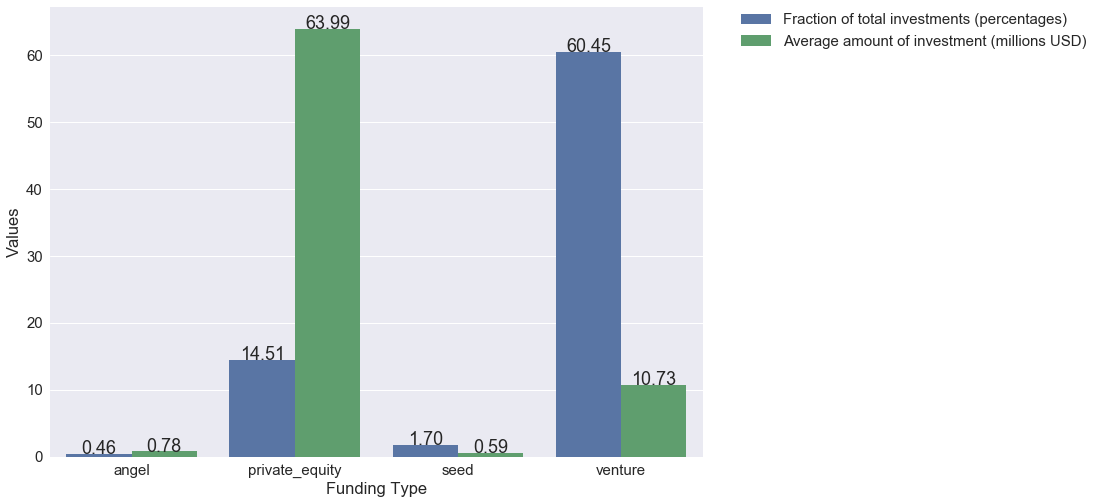

In [805]:
ax=sns.barplot(x="funding_round_type", y="value", hue="CalculationType", data=by_funding_round_type_plot,hue_order =["Fraction of total investments (percentages)","Average amount of investment (millions USD)"])
ax.set(xlabel= "Funding Type", ylabel = "Values" )
show_values_on_bars(ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [806]:
top9['Total_raised_amount_usd'] = top9['Total_raised_amount_usd']/1000000000
#top9

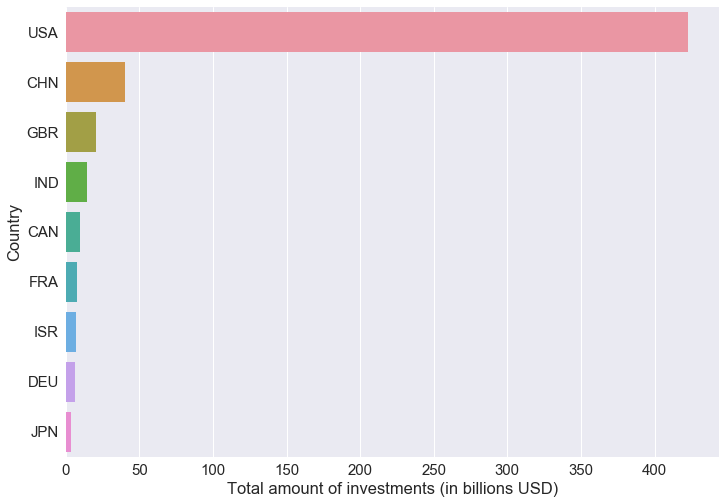

In [807]:
ax1=sns.barplot(x="Total_raised_amount_usd", y="country_code", data=top9)
ax1.set(xlabel= "Total amount of investments (in billions USD)", ylabel = "Country" )
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [808]:
D1_USA['Country_Code'] = 'USA'
#D1_USA

In [809]:
D2_GBR['Country_Code'] = 'GBR'
#D2_GBR

In [810]:
D3_IND['Country_Code'] = 'IND'
#D3_IND

In [811]:
# Removing Others which is Top 1 for top 3 countries (USA,GBR,IND) and considering next top 3
df_graph = D1_USA[1:4].reset_index(drop = True)
df_graph = df_graph.append(D2_GBR[1:4], ignore_index=True).append(D3_IND[1:4], ignore_index=True)
#df_graph

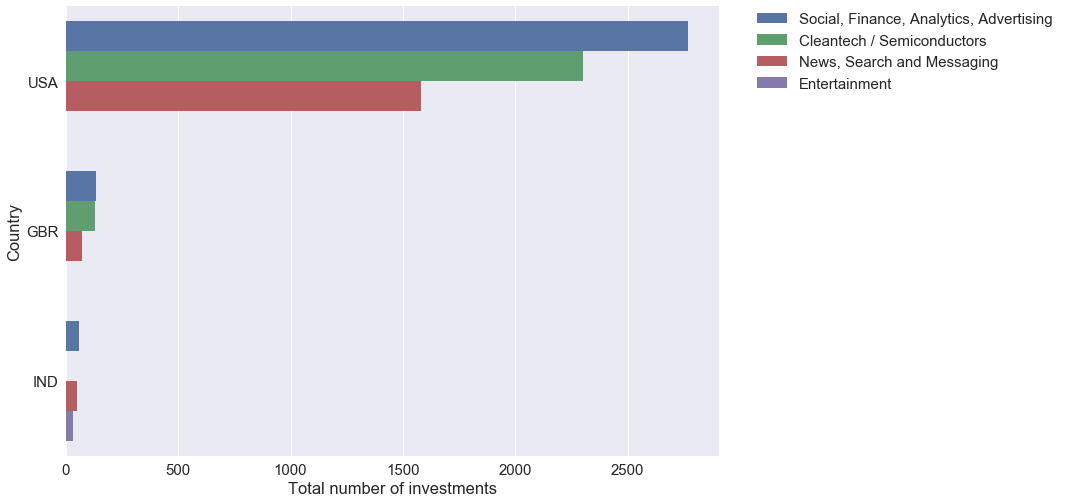

In [812]:
ax2=sns.barplot(x="Total_number_of_investments",y="Country_Code", hue="main_sector", data=df_graph)
ax2.set(xlabel= "Total number of investments", ylabel = "Country" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()